In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json

In [2]:
from types import SimpleNamespace

paths = SimpleNamespace(
    summary="results/rnnprop_{}/summary.csv",
    config="results/rnnprop_{}/config.json",
    evaluation="results/rnnprop_{}/period_19.npz",
    baseline="results/adam.json")

In [3]:
full_names = {
    "base": "IL, 1 Teacher",
    "metaonly": "No IL",
    "2t": "IL, 2 Teachers, Mean",
    "2t_max": "IL, 2 Teachers, Max"
}

In [4]:
def moving_average(a, n=10):
    """Moving average utility with truncated averages for the tails.
    
    Parameters
    ----------
    a : np.array
        Array input. Should be one dimensional.
    n : int
        Moving average window.
    """
    # Center
    cs = np.cumsum(a, dtype=float)
    cs[n:] = cs[n:] - cs[:-n]
    center = cs[n - 1:] / n

    # Tails
    left = np.cumsum(a[:int(n / 2)]) / np.arange(1, 1 + int(n / 2))
    right = np.flip(
        np.cumsum(a[-int(n / 2):][::-1]) / np.arange(1, 1 + int(n / 2)))
    return np.concatenate([left, center, right])


def plot_band(ax, x, y, label=None, color=None):
    """Plot mean and min-to-max color band for stacked data y."""
    lower, upper, mean = [f(y, axis=0) for f in [np.min, np.max, np.mean]]
    mean_line, = ax.plot(x, mean, label=label)
    ax.fill_between(x, lower, upper, alpha=0.25, color=mean_line.get_color())
    return mean_line

Text(0, 0.5, 'Validation Accuracy')

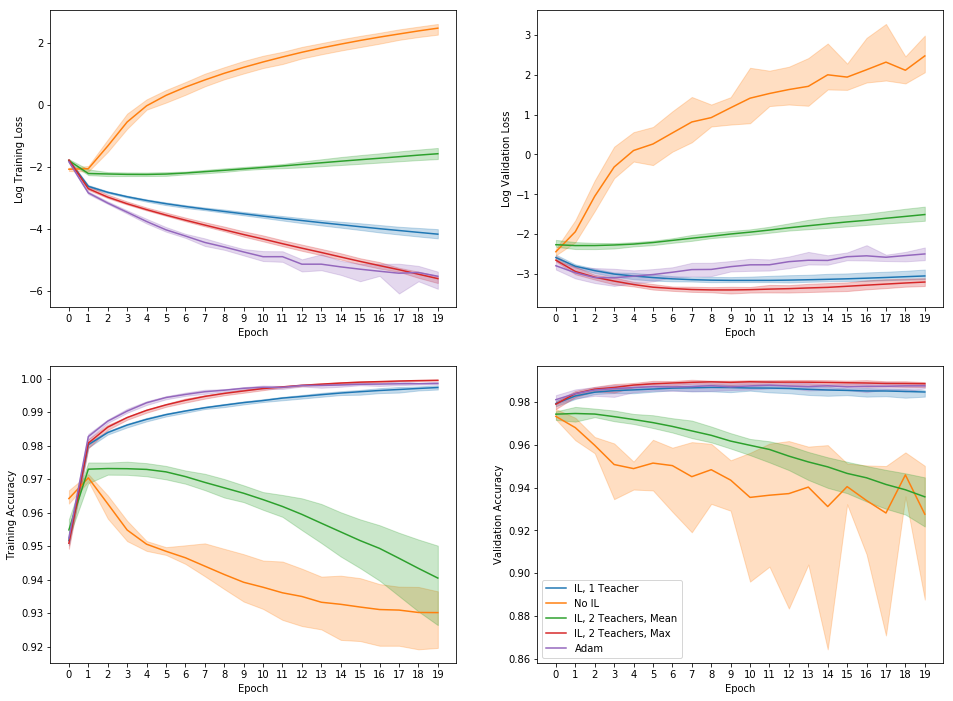

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
keys = ["loss", "val_loss", "sparse_categorical_accuracy", "val_sparse_categorical_accuracy"]

for key in ["base", "metaonly", "2t", "2t_max", "adam"]:
    d = np.load("results/baseline_adam.npz" if key == "adam" else paths.evaluation.format(key)) 
    for ax, val in zip([*axs[0], *axs[1]], keys):
        y_val = np.log(d[val]) if val.endswith("loss") else d[val]
        plot_band(ax, np.arange(20), y_val, label="Adam" if key == "adam" else full_names[key])

for ax in [*axs[0], *axs[1]]:
    ax.set_xticks(np.arange(20))
    ax.set_xlabel("Epoch")

axs[1][1].legend()

axs[0][0].set_ylabel("Log Training Loss")
axs[0][1].set_ylabel("Log Validation Loss")
axs[1][0].set_ylabel("Training Accuracy")
axs[1][1].set_ylabel("Validation Accuracy")


(0.97, 0.992)

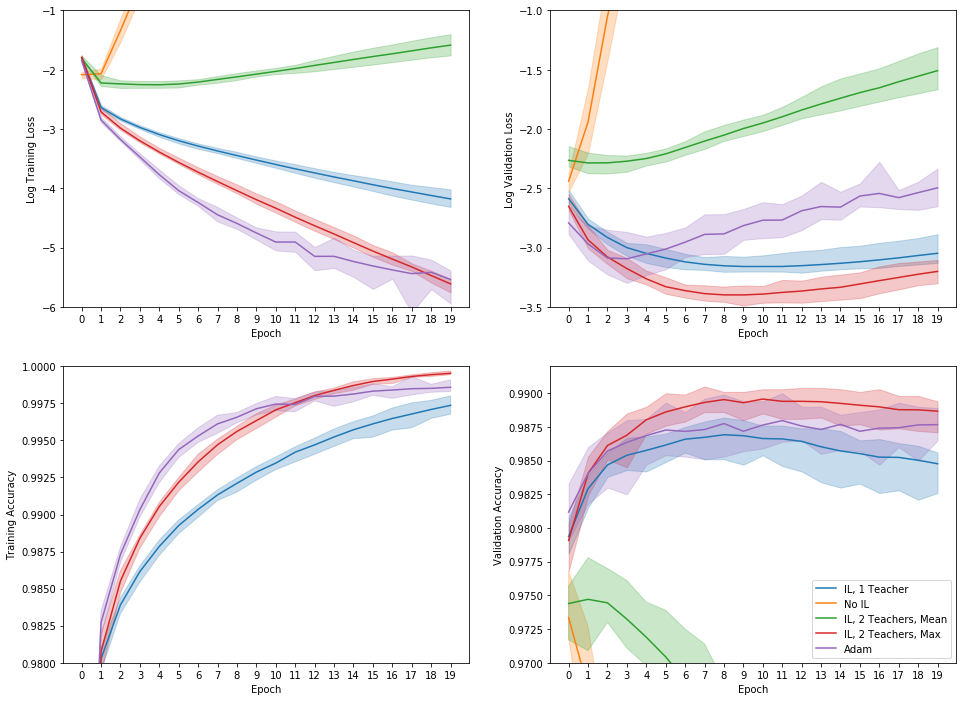

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
keys = ["loss", "val_loss", "sparse_categorical_accuracy", "val_sparse_categorical_accuracy"]

for key in ["base", "metaonly", "2t", "2t_max", "adam"]:
    d = np.load("results/baseline_adam.npz" if key == "adam" else paths.evaluation.format(key)) 
    for ax, val in zip([*axs[0], *axs[1]], keys):
        y_val = np.log(d[val]) if val.endswith("loss") else d[val]
        plot_band(ax, np.arange(20), y_val, label="Adam" if key == "adam" else full_names[key])

for ax in [*axs[0], *axs[1]]:
    ax.set_xticks(np.arange(20))
    ax.set_xlabel("Epoch")

axs[1][1].legend()

axs[0][0].set_ylabel("Log Training Loss")
axs[0][1].set_ylabel("Log Validation Loss")
axs[1][0].set_ylabel("Training Accuracy")
axs[1][1].set_ylabel("Validation Accuracy")

axs[0][0].set_ylim(-6, -1)
axs[0][1].set_ylim(-3.5, -1)
axs[1][0].set_ylim(0.98, 1)
axs[1][1].set_ylim(0.97, 0.992)


(0.0, 0.014)

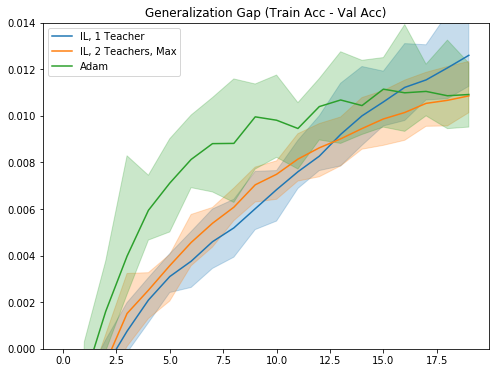

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

for key in ["base", "2t_max", "adam"]:
    d = np.load("results/baseline_adam.npz" if key == "adam" else paths.evaluation.format(key))

    plot_band(
        axs, np.arange(20),
        d["sparse_categorical_accuracy"] - d["val_sparse_categorical_accuracy"],
        label="Adam" if key == "adam" else full_names[key])

axs.legend()
axs.set_title("Generalization Gap (Train Acc - Val Acc)")
axs.set_ylim(0.0, 0.014)

(0.983, 0.99)

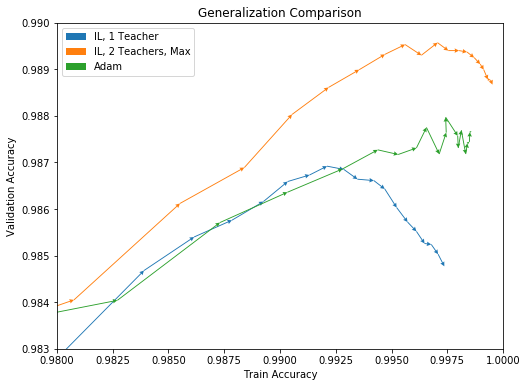

In [43]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

for key, color in zip(["base", "2t_max", "adam"], ['tab:blue', 'tab:orange', 'tab:green']):
    d = np.load("results/baseline_adam.npz" if key == "adam" else paths.evaluation.format(key))

    x = np.mean(d["sparse_categorical_accuracy"], axis=0)
    y = np.mean(d["val_sparse_categorical_accuracy"], axis=0)
    label = "Adam" if key == "adam" else full_names[key]

    axs.quiver(
        x[:-1], y[:-1], x[1:] - x[:-1], y[1:] - y[:-1],
        width=0.002, headwidth=5, headlength=5, color=color,
        scale_units="xy", angles="xy", scale=1, label=label)

axs.legend()
axs.set_xlabel("Train Accuracy")
axs.set_ylabel("Validation Accuracy")
axs.set_title("Generalization Comparison")
axs.set_xlim(0.980, 1.00)
axs.set_ylim(0.983, 0.99)

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

for key, color in zip(["base", "2t_max", "adam"], ['tab:blue', 'tab:orange', 'tab:green']):
    d = np.load("results/baseline_adam.npz" if key == "adam" else paths.evaluation.format(key))

    x = np.mean(d["sparse_categorical_accuracy"], axis=0)
    y = np.mean(d["val_sparse_categorical_accuracy"], axis=0)
    label = "Adam" if key == "adam" else full_names[key]

    axs.quiver(
        x[:-1], y[:-1], x[1:] - x[:-1], y[1:] - y[:-1],
        width=0.002, headwidth=5, headlength=5, color=color,
        scale_units="xy", angles="xy", scale=1, label=label)

axs.legend()
axs.set_xlabel("Train Accuracy")
axs.set_ylabel("Validation Accuracy")
axs.set_title("Generalization Comparison")
